# EDA y estimaciones sobre Presión Arterial en pacientes

En esta notebook, mostraremos el proceso del análisis exploratorio de datos de pacientes en clínicas/hospitales de Neuquén, Argentina. Haremos enfoque en la presión arterial sistólica y diastólica de cada paciente (TAS y TAD), estimando posibles consecuencias, según los resultados de cada consulta médica realizada.

Alumnos:
- Ortega Cor, Maria Eva
- Rodriguez, Javier Ceferino

## Importación de librerías y configuraciones

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [67]:
pd.set_option('display.max_columns', None)
plt.rcParams.update({'font.size': 13})

## Conociendo el dataset

In [8]:
df = pd.read_csv("./para_ejercitacion_con_RCVG_1.csv", delimiter=";", index_col="idPACIENTE")
print('Shape: ', df.shape)
df.head(10)

Shape:  (59965, 49)


,SEXO,FECHA DE NACIMIENTO,PROV/LOC,LOCALIDAD,UTMA_CONSULTA_SISTEMA,FECHA_UTMA_CONSULTA_VINCULADA,EFECTOR_UTMA_CONSULTA_VINCULADA,ZONA_UTMA_CONSULTA_VINCULADA,DIABETES,DISLIPEMIA,HIPERTENSION,OBESIDAD,ENF. CARDIOVASCULAR ESTABLECIDA,CARDIOPATIA ISQUEMICA,ENF. CEREBROVASCULAR,ENF. ARTERIAL PERIFERICA,LESIONES PIERNA PIE,TAS,TAD,FECHA_UTMA_TA,PESO,TALLA,UTMO_IMC,CLASIFICACION_IMC,FECHA_UTMO_IMC,IMC_REFERENCIA,FECHA_IMC_REFERENCIA,DIFERENCIA_IMC,PORC_VARIACION_IMC,MESES_REFERENCIA,PORC_VARIACION_IMC_ANUALIZADO,HbA1c,FECHA_HbA1c,FECHA_CREATININEMIA,CREATININEMIA,FECHA_CLEARANCE,CLEARANCE,FECHA_RAC,RAC,DANNO_RENAL,ENFERMEDAD RENAL CRONICA,COLESTEROL_TOTAL,FECHA_UTMO_COLESTEROL_TOTAL,COLESTEROL_TOTAL.1,FECHA_UTMO_LDL,FECHA FONDO OJO,RESULTADO FONDO OJO,FECHA NUTRICION,FECHA ODONTO
idPACIENTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2RIIN10249,FEMENINO,22/01/1928,.,NaN,20/08/2021,06/03/2019,"HOSPITAL PROVINCIAL NEUQUEN ""DR. EDUARDO CAST...",ZONA SANITARIA METROPOLITANA,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,140.0,90.0,27/12/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28/01/2021,0.65,28/01/2021,76.48,NaN,NaN,DR2,NaN,176.00,22/06/2016,124.0,22/06/2016,NaN,NaN,NaN,NaN
2SICA11223,FEMENINO,22/09/1930,ZAPALA,ZAPALA,30/06/2021,05/08/2020,C.S. DON BOSCO,ZONA SANITARIA II,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,170.0,90.0,15/01/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28/12/2019,1.03,28/12/2019,48.14,NaN,NaN,DR3,NaN,152.00,24/05/2017,86.0,24/05/2017,NaN,NaN,30/04/2020,NaN
2FEJO9326,FEMENINO,13/07/1925,.,NaN,05/08/2021,02/09/2019,"HOSPITAL PROVINCIAL NEUQUEN ""DR. EDUARDO CAST...",ZONA SANITARIA METROPOLITANA,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,01/11/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02/09/2019,0.90,02/09/2019,54.76,NaN,NaN,DR3,NaN,264.00,08/07/2013,NaN,NaN,NaN,NaN,NaN,NaN
2MOAL10536,FEMENINO,04/11/1928,CONFLUENCIA,NEUQUEN,30/04/2021,27/04/2021,HOSPITAL BOUQUET ROLDAN,ZONA SANITARIA METROPOLITANA,DM2,NO,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,08/04/2021,1.81,08/04/2021,24.90,NaN,NaN,DR4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2MUAN8668,FEMENINO,24/09/1923,CONFLUENCIA,NEUQUEN,21/05/2019,18/01/2018,C.S. LAS PIEDRITAS,ZONA SANITARIA IV,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20/05/2019,1.53,20/05/2019,28.61,NaN,NaN,DR4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2CHFR10797,FEMENINO,23/07/1929,.,NaN,15/03/2018,15/03/2018,HOSPITAL JUNIN DE LOS ANDES,ZONA SANITARIA IV,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2HELI8172,FEMENINO,16/05/1922,CONFLUENCIA,NEUQUEN,28/07/2021,16/01/2019,HOSPITAL CUTRAL CO-PLAZA HUINCUL,ZONA SANITARIA V,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30/01/2020,0.81,30/01/2020,60.88,NaN,NaN,DR2,NaN,148.88,22/07/2016,NaN,NaN,NaN,NaN,NaN,NaN
2BEPA7832,FEMENINO,10/06/1921,CONFLUENCIA,VILLA EL CHOCON,09/02/2018,09/02/2018,HOSPITAL EL CHOCON,ZONA SANITARIA V,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2MAMA8965,FEMENINO,17/07/1924,CONFLUENCIA,NEUQUEN,24/06/2020,15/02/2019,HOSPITAL HORACIO HELLER,ZONA SANITARIA METROPOLITANA,NO,NO,SI,NO,NO,NaN,NaN,NaN,NaN,110.0,70.0,04/10/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/08/2020,0.82,07/08/2020,118.55,NaN,NaN,DR1,NaN,130.00,30/11/2015,63.0,30/11/2015,NaN,NaN,NaN,NaN


### Columnas del dataset

Columna | Descripción
---|---
SEXO | Género del paciente
FECHA DE NACIMIENTO | Fecha de nacimiento en formato DD/MM/AAAA
PROV/LOC | Provincia o Localidad
LOCALIDAD | Localidad
UTMA_CONSULTA_SISTEMA | Última consulta registrada en el sistema en formato DD/MM/AAAA
FECHA_UTMA_CONSULTA_VINCULADA | Última consulta vinculada en formato DD/MM/AAAA
EFECTOR_UTMA_CONSULTA_VINCULADA | Establecimiento de la última consulta vinculada
ZONA_UTMA_CONSULTA_VINCULADA | Zona correspondiente de la última consulta vinculada
DIABETES | Tipo de diabétes
DISLIPEMIA | Niveles excesivamente elevados de colesterol o grasas (lípidos) en la sangre (SI o NO)
HIPERTENSION | Afección en la que la presión de la sangre hacia las paredes de la arteria es demasiado alta (SI o NO)
OBESIDAD | Trastorno caracterizado por niveles excesivos de grasa corporal que aumentan el riesgo de tener problemas de salud (SI o NO)
ENF. CARDIOVASCULAR ESTABLECIDA | Pacientes en riesgo alto y muy alto de un evento cardiaco-vascular (SI o NO)
CARDIOPATIA ISQUEMICA | Lesión o enfermedad en los principales vasos sanguíneos del corazón (NaN o SI)
ENF. CEREBROVASCULAR | Lesión en el cerebro ocasionada por la interrupción de la irrigación sanguínea (NaN o SI)
ENF. ARTERIAL PERIFERICA | Afección circulatoria en la que el estrechamiento de los vasos sanguíneos reduce la irrigación sanguínea a los miembros (NaN o SI)
LESIONES PIERNA PIE | Lesiones en la pierna o pie (NaN o SI)
TAS | (Presión Arterial Sistólica) Presión causada cuando el corazón se contrae y empuja la sangre hacia afuera
TAD | (Presión Arterial Diastólica) Presión que ocurre cuando el corazón se relaja y se llena de sangre
FECHA_UTMA_TA | Fecha de última medición de tensión arterial en formato DD/MM/AAAA
PESO | Peso del paciente (kg)
TALLA | Altura del paciente (metros)
UTMO_IMC | Último IMC calculado
CLASIFICACION_IMC | Clasificación del IMC
FECHA_UTMO_IMC | Fecha del último IMC calculado
IMC_REFERENCIA | IMC de referencia
FECHA_IMC_REFERENCIA | Fecha del IMC de referencia
DIFERENCIA_IMC | Diferencia entre IMC calculado y el IMC de referencia
PORC_VARIACION_IMC | ???
MESES_REFERENCIA | ???
PORC_VARIACION_IMC_ANUALIZADO | ???
HbA1c | Prueba de Hemoglobina Glicosilada (HbA1c)
FECHA_HbA1c | Fecha de último examen de hbA1c
FECHA_CREATININEMIA | Fecha de último examen de creatininemia
CREATININEMIA | Examen de sangre que mide la concentración de creatinina en sangre
FECHA_CLEARANCE | Fecha de último examen de clearence
CLEARANCE | Examen de depuración de la creatinina
FECHA_RAC | Fecha de último examen de RAC
RAC | Examen de RAC (microalbuminuria)
DANNO_RENAL | Tipo de daño renal
ENFERMEDAD RENAL CRONICA | Estadío de enfermedad renal crónica
COLESTEROL_TOTAL | Examen de colesterol (HDL)
FECHA_UTMO_COLESTEROL_TOTAL | Fecha de último examen de colesterol (HDL)
COLESTEROL_TOTAL.1 | Examen de colesterol (LDL)
FECHA_UTMO_LDL | Fecha de último examen de colesterol (LDL)
FECHA FONDO OJO | Fecha de último fondo de ojo
RESULTADO FONDO OJO | Resultado de fondo de ojo
FECHA NUTRICION | Fecha de última visita a nutricionista
FECHA ODONTO | Fecha de última visita a odontólogo

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59965 entries, 2RIIN10249 to 2ARES23111
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SEXO                             59965 non-null  object 
 1   FECHA DE NACIMIENTO              59965 non-null  object 
 2   PROV/LOC                         59964 non-null  object 
 3   LOCALIDAD                        35111 non-null  object 
 4   UTMA_CONSULTA_SISTEMA            59965 non-null  object 
 5   FECHA_UTMA_CONSULTA_VINCULADA    59965 non-null  object 
 6   EFECTOR_UTMA_CONSULTA_VINCULADA  59965 non-null  object 
 7   ZONA_UTMA_CONSULTA_VINCULADA     59965 non-null  object 
 8   DIABETES                         59965 non-null  object 
 9   DISLIPEMIA                       59965 non-null  object 
 10  HIPERTENSION                     59965 non-null  object 
 11  OBESIDAD                         59965 non-null  object 
 12  ENF. CARD

In [11]:
df.describe()

,TAS,TAD,PESO,TALLA,UTMO_IMC,IMC_REFERENCIA,DIFERENCIA_IMC,PORC_VARIACION_IMC,MESES_REFERENCIA,PORC_VARIACION_IMC_ANUALIZADO,HbA1c,CREATININEMIA,CLEARANCE,RAC,COLESTEROL_TOTAL,COLESTEROL_TOTAL.1
count,29843.000000,29839.000000,21470.000000,21465.000000,21484.000000,5048.000000,4907.000000,4968.000000,5049.000000,4965.000000,16470.000000,45389.000000,45408.000000,9050.000000,41662.000000,36815.000000
mean,125.857823,77.290291,83.053600,1.564423,33.215247,32.598108,0.317406,0.482323,12.076847,0.565738,7.538026,1.457629,92.782396,78.588148,186.842548,136.118341
std,25.807840,17.463427,23.889581,0.154683,7.127264,7.746848,3.303770,13.314408,3.851600,15.866860,2.480957,7.052153,32.476592,370.169629,44.967567,523.832422
min,1.000000,7.000000,2.700000,0.470000,4.030000,1.750000,-42.800000,-265.300000,6.000000,-374.500000,0.200000,-0.170000,0.120000,0.000000,0.000000,-109.000000
25%,110.000000,70.000000,71.200000,1.520000,29.087500,27.827500,-1.000000,-3.100000,9.000000,-3.400000,5.700000,0.670000,73.210000,5.000000,157.000000,87.000000
50%,120.000000,80.000000,83.400000,1.580000,32.660000,32.050000,0.400000,1.000000,12.000000,1.000000,6.800000,0.820000,91.660000,12.000000,183.000000,110.000000
75%,140.000000,85.000000,96.300000,1.650000,37.040000,36.972500,1.800000,5.500000,15.000000,5.600000,9.152500,0.990000,109.692500,35.180000,213.000000,137.000000
max,1580.000000,977.000000,256.700000,2.000000,88.300000,79.300000,29.200000,90.100000,18.000000,120.100000,62.000000,173.000000,299.960000,14168.000000,730.000000,24800.000000


In [12]:
interest = [
    "SEXO", "DIABETES", "DISLIPEMIA", "HIPERTENSION", "OBESIDAD", "ENF. CARDIOVASCULAR ESTABLECIDA",
    "CARDIOPATIA ISQUEMICA", "ENF. CEREBROVASCULAR", "ENF. ARTERIAL PERIFERICA", "LESIONES PIERNA PIE",
    "CLASIFICACION_IMC", "DANNO_RENAL", "ENFERMEDAD RENAL CRONICA"
]
for col in df:
    if col in interest:
        print(f"{col}: ", df[col].unique())

SEXO:  ['FEMENINO' 'MASCULINO']
DIABETES:  ['NO' 'DM2' 'DM1']
DISLIPEMIA:  ['NO' 'SI']
HIPERTENSION:  ['SI' 'NO']
OBESIDAD:  ['NO' 'SI']
ENF. CARDIOVASCULAR ESTABLECIDA:  ['NO' 'SI']
CARDIOPATIA ISQUEMICA:  [nan 'SI']
ENF. CEREBROVASCULAR:  [nan 'SI']
ENF. ARTERIAL PERIFERICA:  [nan 'SI']
LESIONES PIERNA PIE:  [nan 'SI']
CLASIFICACION_IMC:  [nan 'NORMAL' 'OBESIDAD' 'SOBREPESO' 'BAJO PESO']
DANNO_RENAL:  ['DR2' 'DR3' 'DR4' nan 'DR1' 'DR5']
ENFERMEDAD RENAL CRONICA:  [nan 'ERC SIN DATO DE ESTADIO' 'ESTADIO 4' 'ESTADIO 2' 'ESTADIO 3'
 'ESTADIO 5' 'ESTADIO 1']


# EDA

Arrancamos por adicionar una nueva columna "TENSION ARTERIAL TIPO" para obtener el nuevo rango de valores de hipertensión

In [57]:
order_tension=["Normal", "Prehipertensión", "Hipertensión Estadio 1", "Hipertensión Estadio 2"]
def tension_arterial_cond(data):
    if (data["TAS"] < 120) and (data["TAD"] < 80): return "Normal"
    if (120 <= data["TAS"] <= 139) or (80 <= data["TAD"] <= 89): return "Prehipertensión"
    if (140 <= data["TAS"] <= 159) or (90 <= data["TAD"] <= 99): return "Hipertensión Estadio 1"
    if (data["TAS"] >= 160) or (data["TAD"] >= 100): return "Hipertensión Estadio 2"
    # return "Sin datos"

In [38]:
df_tension = df.copy().dropna(subset=["TAS", "TAD"])
df_tension = df_tension.loc[(df_tension["TAS"] < 1000) & (df_tension["TAD"] < 600)] # Para eliminar outliers detectados
df_tension["TENSION ARTERIAL TIPO"] = df_tension.apply(tension_arterial_cond, axis=1)
print('Shape: ', df_tension.shape)
df_tension["TENSION ARTERIAL TIPO"].value_counts()

Shape:  (29830, 50)


Prehipertensión           15427
Normal                     8202
Hipertensión Estadio 1     4493
Hipertensión Estadio 2     1708
Name: TENSION ARTERIAL TIPO, dtype: int64

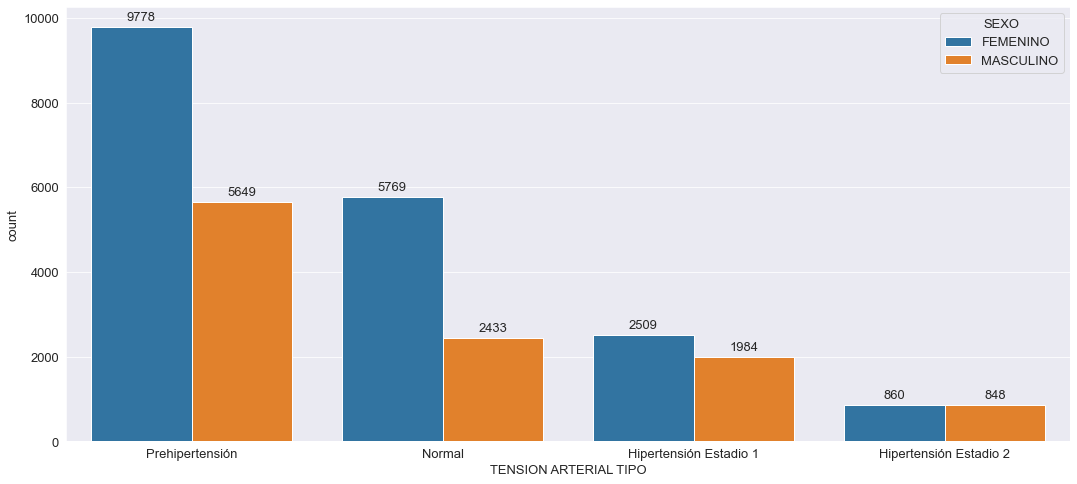

In [75]:
count_tension = df_tension["TENSION ARTERIAL TIPO"].value_counts()

plt.figure(figsize=(18, 8))
cplot = sns.countplot(data=df_tension, x="TENSION ARTERIAL TIPO", order=count_tension.index, hue="SEXO")
for p in cplot.patches:
    cplot.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va= 'center',
        xytext = (0, 10),
        textcoords = 'offset points'
    )
plt.show()

Ahora veremos la correlación existente entre variables numérica. En particular nos interesan las que tengan mayor correlación con TAS y TAD

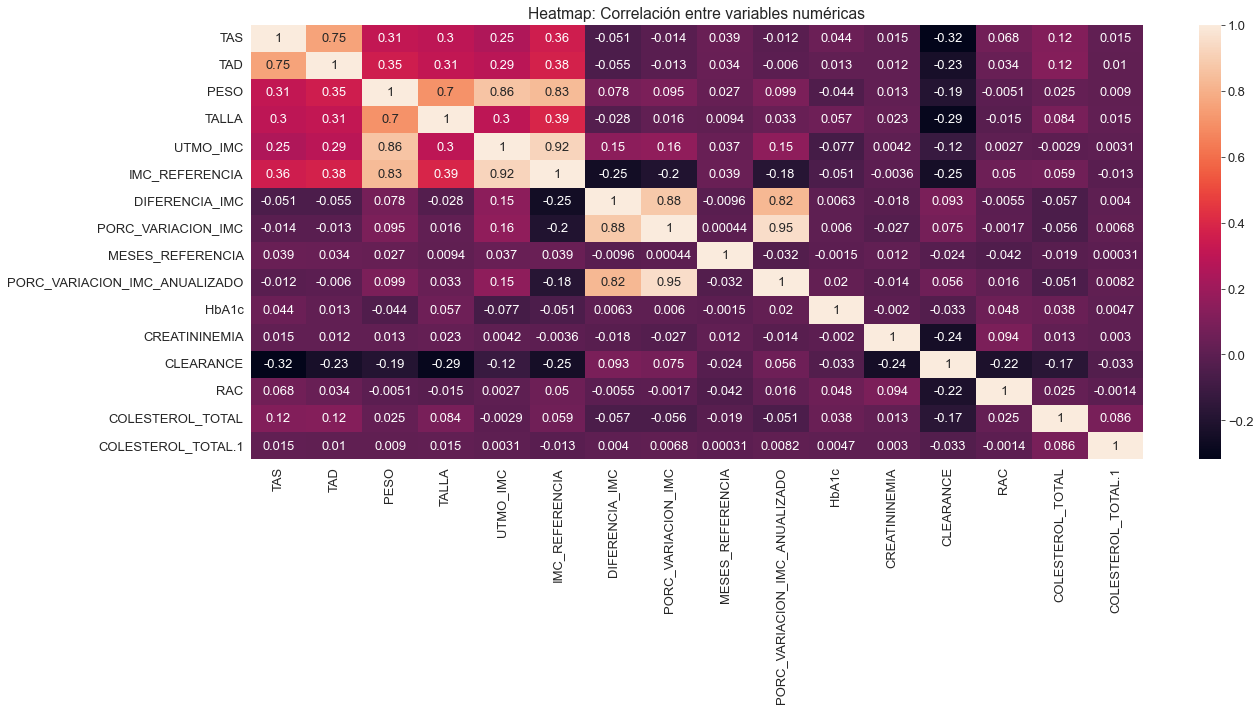

In [74]:
corr = df_tension.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True)
plt.title("Heatmap: Correlación entre variables numéricas")
plt.show()

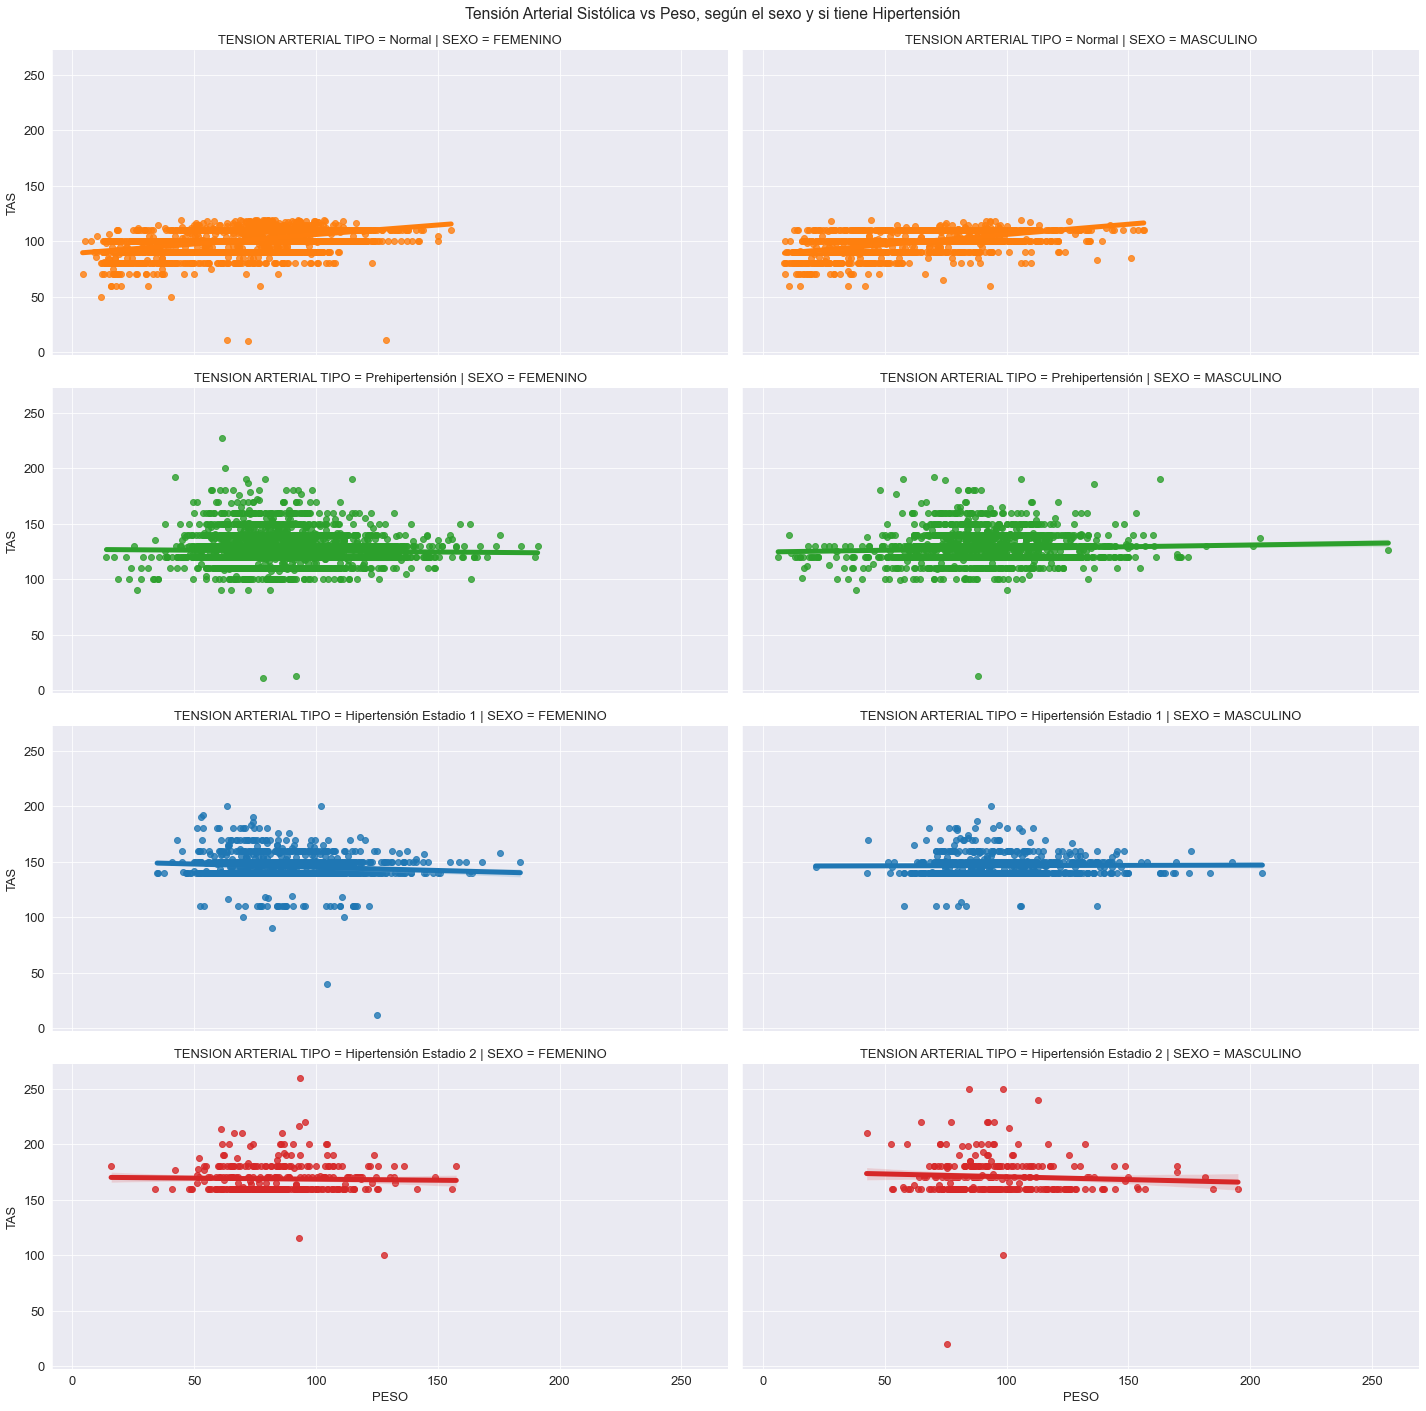

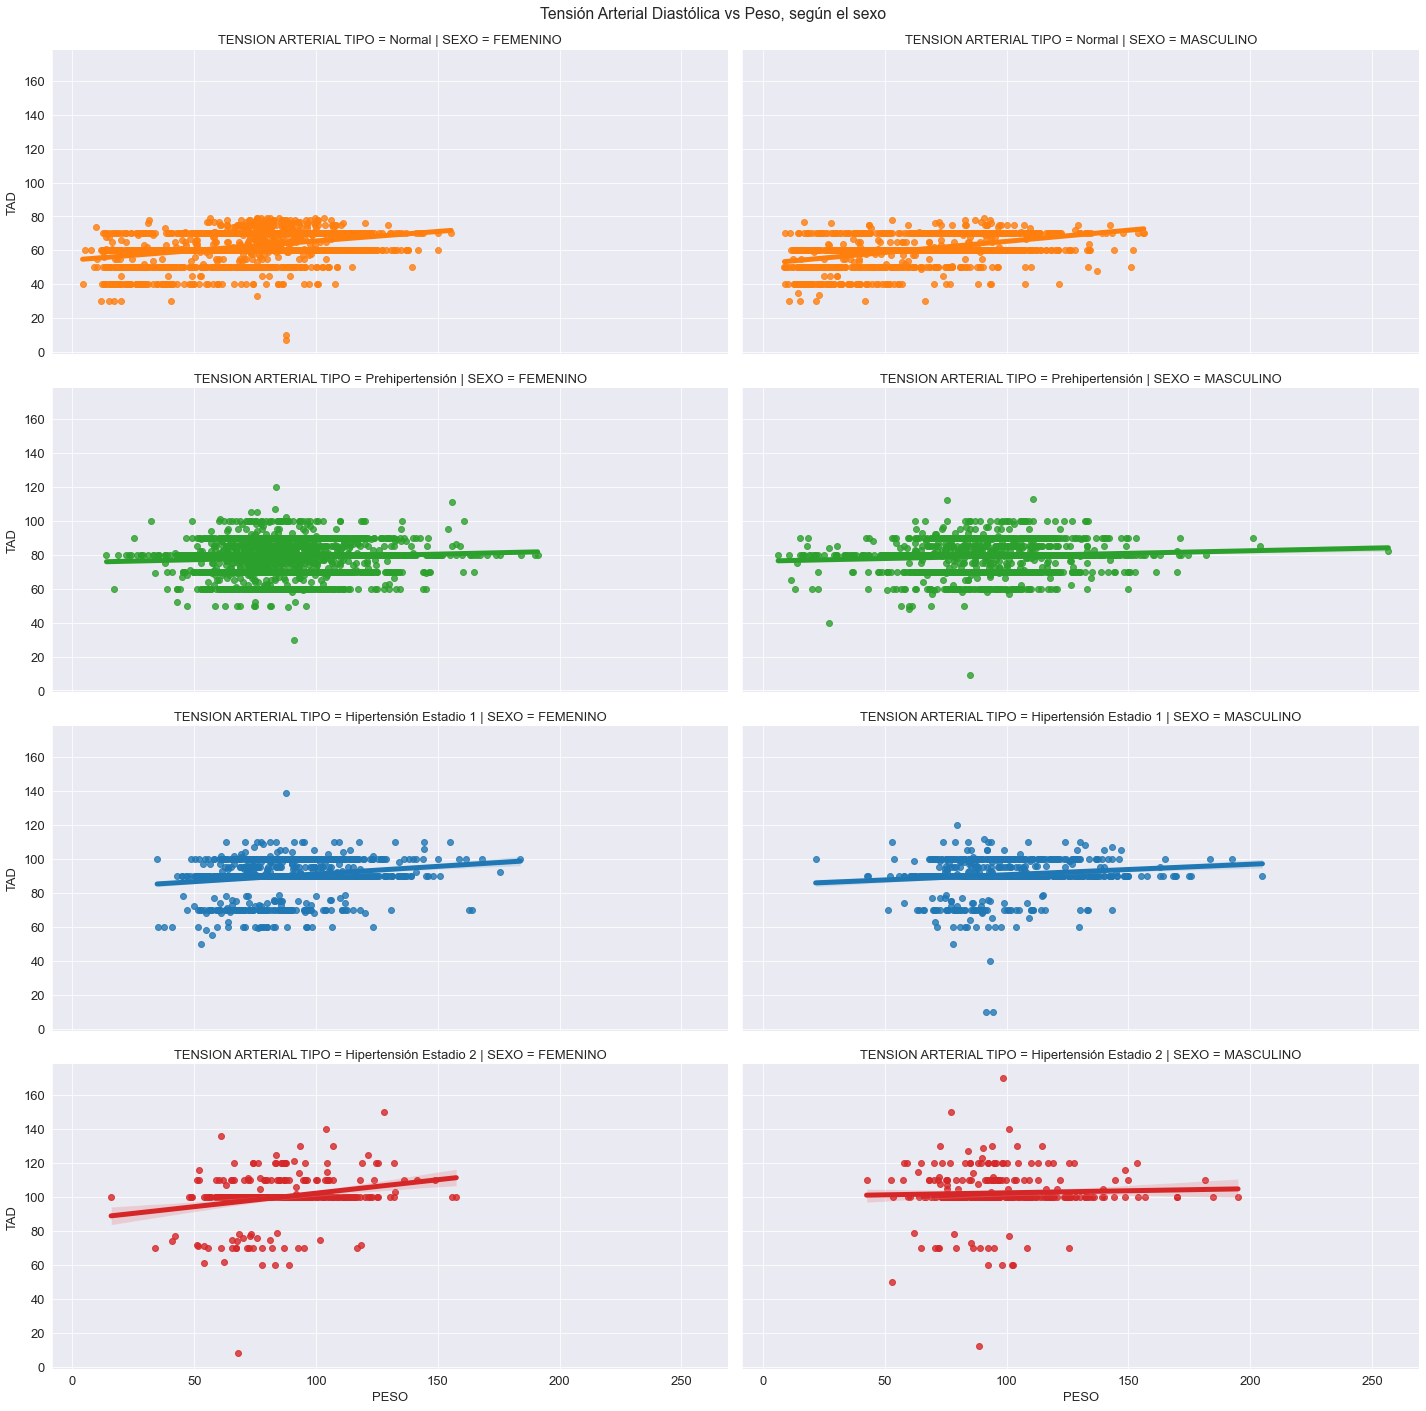

In [73]:
lm1 = sns.lmplot(data=df_tension, y="TAS", x="PESO", col="SEXO", row="TENSION ARTERIAL TIPO", hue="TENSION ARTERIAL TIPO", aspect=2, line_kws={"lw":5}, row_order=order_tension)
lm1.fig.suptitle("Tensión Arterial Sistólica vs Peso, según el sexo y si tiene Hipertensión")
lm1.fig.subplots_adjust(top=.95)

lm2 = sns.lmplot(data=df_tension, y="TAD", x="PESO", col="SEXO", row="TENSION ARTERIAL TIPO", hue="TENSION ARTERIAL TIPO", aspect=2, line_kws={"lw":5}, row_order=order_tension)
lm2.fig.suptitle("Tensión Arterial Diastólica vs Peso, según el sexo")
lm2.fig.subplots_adjust(top=.95)

plt.show()

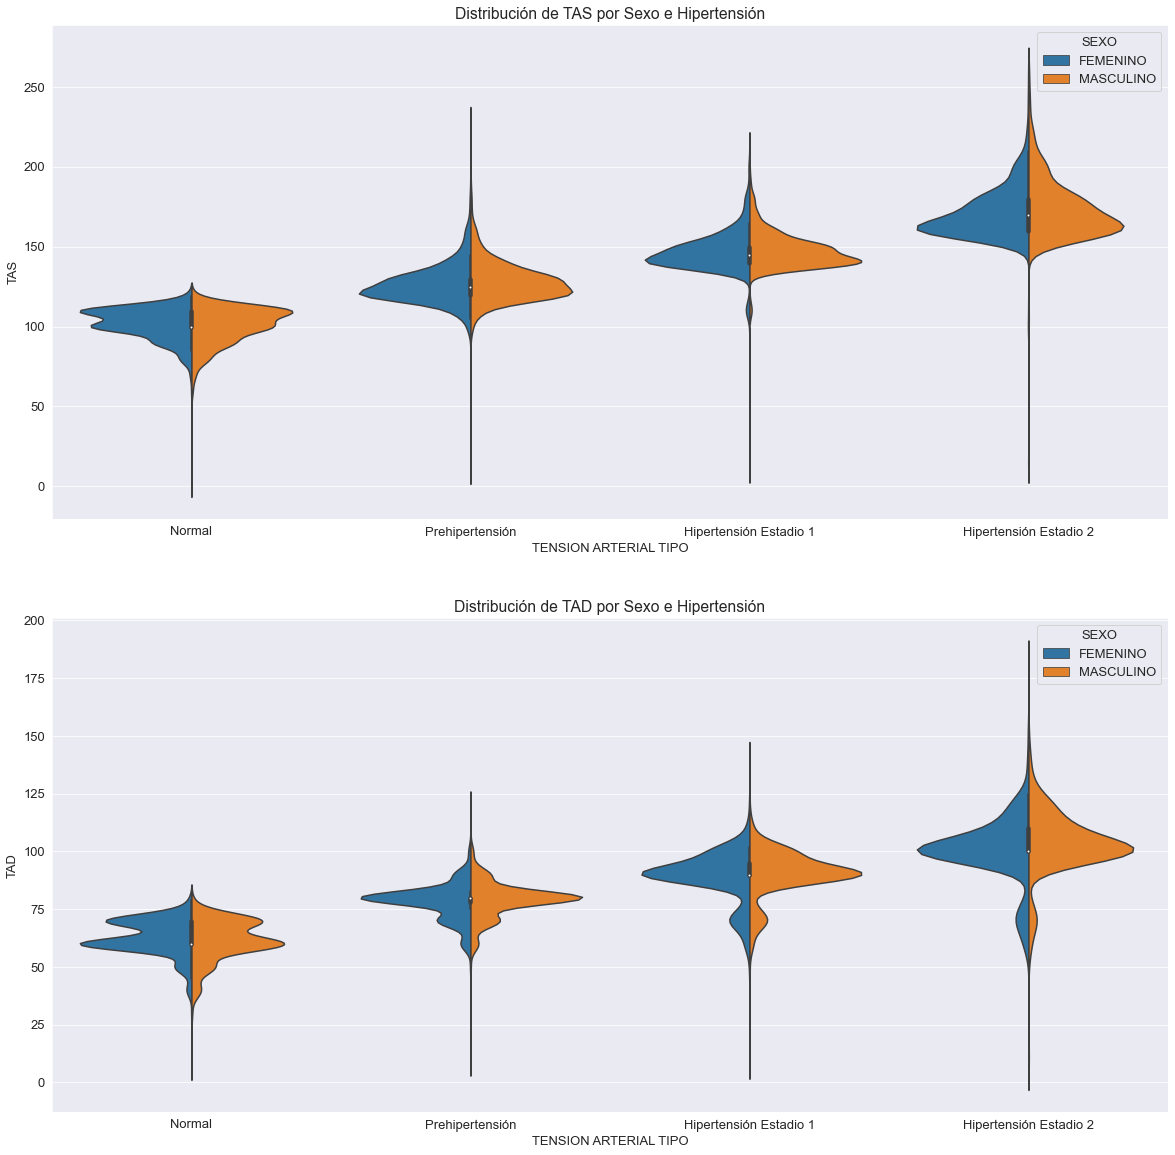

In [72]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)
sns.violinplot(data=df_tension, y="TAS", hue="SEXO", x="TENSION ARTERIAL TIPO", split=True, order=order_tension, bw=.4)
plt.title("Distribución de TAS por Sexo e Hipertensión")

plt.subplot(2, 1, 2)
sns.violinplot(data=df_tension, y="TAD", hue="SEXO", x="TENSION ARTERIAL TIPO", split=True, order=order_tension, bw=.4)
plt.title("Distribución de TAD por Sexo e Hipertensión")

plt.show()